# AE102 - Data Analysis and Interpretation
---
## Assignment 02
## Soham S. Phanse, 19D170030
---
## Prof. Amuthan Ramabathiran, Prof. Prabhu Ramchandran

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import describe as d
from scipy.stats import norm
from scipy.stats import dweibull
from scipy.stats import chi2

In [ ]:
number_of_samples = 1000
samples_each = 5

(0.0, 10.0)

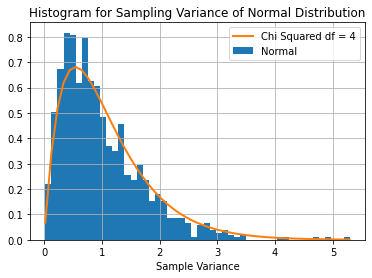

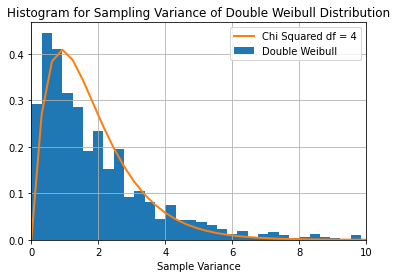

In [ ]:
def n():
  return norm.rvs(loc = 0, scale = 1, size = samples_each)

def dwe():
  return dweibull.rvs(1.0, loc = 0, scale = 1, size = samples_each)

samvarn = []
samvarw = []

for i in range(number_of_samples):
  samvarn.append(d(n()).variance)
  samvarw.append(d(dwe()).variance)

# Histogram for Normal distribution
plt.figure(1)
count, bins, ignored = plt.hist(samvarn, 50, density = True, label='Normal')
plt.plot(bins, chi2(samples_each - 1, loc = 0, scale = 0.27).pdf(bins), linewidth = 2, label='Chi Squared df = 4')
plt.title('Histogram for Sampling Variance of Normal Distribution');
plt.xlabel('Sample Variance')
plt.grid(True)
plt.legend(loc='best')

# Histogram for Double Weibull distribution
plt.figure(2)
count2, bins2, ignored2 = plt.hist(samvarw, 50, density=True, label='Double Weibull')
plt.plot(bins2, chi2(samples_each - 1, loc = 0, scale = 0.45).pdf(bins2), linewidth = 2, label='Chi Squared df = 4')
plt.title('Histogram for Sampling Variance of Double Weibull Distribution');
plt.xlabel('Sample Variance')
plt.grid(True)
plt.legend(loc='best')
plt.xlim(0, 10)

Now we explore what happens if we change the sample size to say 2, 10, 20 etc. Below is an instance for sample size of 20.

(0.0, 10.0)

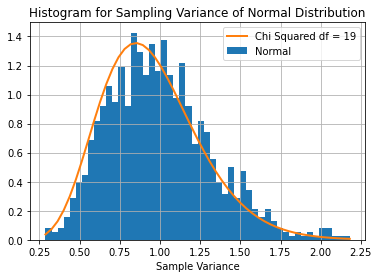

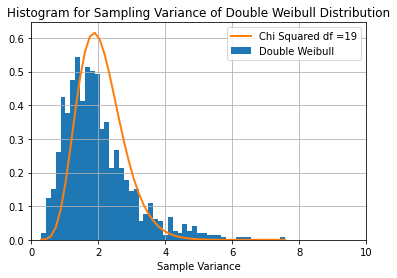

In [ ]:
def n():
  return norm.rvs(loc = 0, scale = 1, size = 20)

def dwe():
  return dweibull.rvs(1.0, loc = 0, scale = 1, size = 20)

samvarn = []
samvarw = []

for i in range(number_of_samples):
  samvarn.append(d(n()).variance)
  samvarw.append(d(dwe()).variance)

# Histogram for Normal distribution
plt.figure(1)
count, bins, ignored = plt.hist(samvarn, 50, density = True, label='Normal')
plt.plot(bins, chi2(20 - 1, loc = 0, scale = 0.05).pdf(bins), linewidth = 2, label='Chi Squared df = '+str(20 - 1))
plt.title('Histogram for Sampling Variance of Normal Distribution');
plt.xlabel('Sample Variance')
plt.grid(True)
plt.legend(loc='best')

# Histogram for Double Weibull distribution
plt.figure(2)
count2, bins2, ignored2 = plt.hist(samvarw, 50, density=True, label='Double Weibull')
plt.plot(bins2, chi2(20 - 1, loc = 0, scale = 0.11).pdf(bins2), linewidth = 2, label='Chi Squared df =' + str(20 - 1))
plt.title('Histogram for Sampling Variance of Double Weibull Distribution');
plt.xlabel('Sample Variance')
plt.grid(True)
plt.legend(loc='best')
plt.xlim(0, 10)

Q2

In [ ]:
from scipy.stats import t

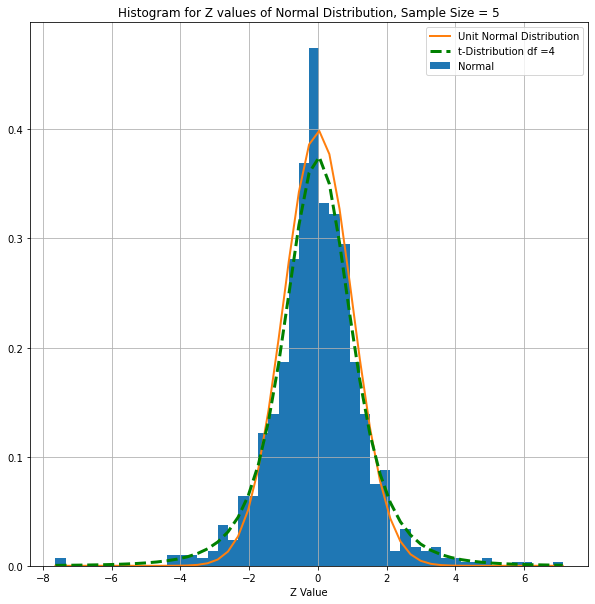

In [ ]:
def n():
  return norm.rvs(loc = 0, scale = 1, size = 5)

number_of_samples = 1000
sample_size = 5
samplemean, samplevar, Z = [], [], []
for i in range(number_of_samples):
  Xbar = d(n()).mean  
  var = d(n()).variance
  S = np.sqrt(var)
  mu = 0
  Z.append((np.sqrt(sample_size)*(Xbar - mu))/(S))
  #samplemean.append(d(n()).mean)
  #samplevar.append(d(n()).variance)

# Histogram for Normal distribution
plt.figure(3, [10, 10])
count, bins, ignored = plt.hist(Z, 50, density = True, label='Normal')
plt.plot(bins, norm(loc=0, scale=1).pdf(bins), linewidth=2, label='Unit Normal Distribution')
plt.plot(bins, t(sample_size-1).pdf(bins), 'g--', linewidth=3, label='t-Distribution df ='+str(sample_size-1))
#plt.plot(bins, chi2(20 - 1, loc = 0, scale = 0.05).pdf(bins), linewidth = 2, label='Chi Squared df = '+str(20 - 1))
plt.title('Histogram for Z values of Normal Distribution, Sample Size = ' + str(sample_size));
plt.xlabel('Z Value')
plt.grid(True)
plt.legend(loc='best')

Q2 for sample size = 20

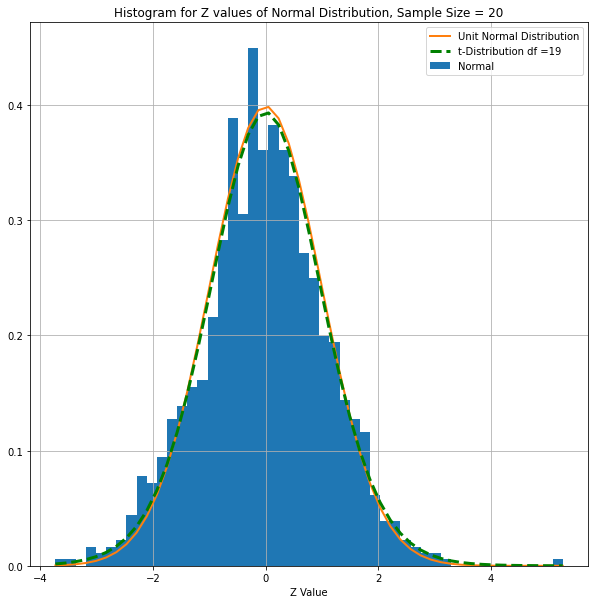

In [ ]:
def n():
  return norm.rvs(loc = 0, scale = 1, size = 20)

number_of_samples = 1000
sample_size = 20
samplemean, samplevar, Z = [], [], []
for i in range(number_of_samples):
  Xbar = d(n()).mean  
  var = d(n()).variance
  S = np.sqrt(var)
  mu = 0
  Z.append((np.sqrt(sample_size)*(Xbar - mu))/(S))
  #samplemean.append(d(n()).mean)
  #samplevar.append(d(n()).variance)

# Histogram for Normal distribution
plt.figure(3, [10, 10])
count, bins, ignored = plt.hist(Z, 50, density = True, label='Normal')
plt.plot(bins, norm(loc=0, scale=1).pdf(bins), linewidth=2, label='Unit Normal Distribution')
plt.plot(bins, t(sample_size-1).pdf(bins), 'g--', linewidth=3, label='t-Distribution df ='+str(sample_size-1))
#plt.plot(bins, chi2(20 - 1, loc = 0, scale = 0.05).pdf(bins), linewidth = 2, label='Chi Squared df = '+str(20 - 1))
plt.title('Histogram for Z values of Normal Distribution, Sample Size = ' + str(sample_size));
plt.xlabel('Z Value')
plt.grid(True)
plt.legend(loc='best')

As the number of sample size increased the normal and the t distribution come closer and closer.

Q3

In [ ]:
from scipy.stats import gamma

# (i)

sample_size, mu, flag, flag2 = 10, 2, 0, 0

def z(a):
  return norm(loc=0, scale=1).cdf(a)

def gamma1():
  return gamma.rvs(2.0, loc=0, scale=1, size = sample_size)

for i in range(100):
  store = gamma1()
  samplemean, samplestddev = d(store).mean, np.sqrt(d(store).variance)
  upper_limit, lower_limit = samplemean + ((z(0.025)*samplestddev)/np.sqrt(sample_size)), samplemean - ((z(0.025)*samplestddev)/np.sqrt(sample_size))
  if mu<=upper_limit and mu>=lower_limit:
    flag = flag + 1
  else:
    flag2 = flag2 + 1

print('The number of times the actual mean lies inside the computed confidence interval is ' + str(flag))
print('The number of times the actual mean does not lie inside the computed confidence interval is ' + str(flag2))
print('The probability that the actual mean lies inside the confidence interval is ' + str(flag/(flag + flag2)))
print()
print('The length of the interval is ' + str(upper_limit - lower_limit))

The number of times the actual mean lies inside the computed confidence interval is 33
The number of times the actual mean does not lie inside the computed confidence interval is 67
The probability that the actual mean lies inside the confidence interval is 0.33

The length of the interval is 0.36264813848143396


In [ ]:
# (ii)
from scipy.stats import t
sample_size, mu, flag, flag2 = 10, 2, 0, 0

def t2(a):
  return t(sample_size - 1).cdf(a)

def gamma1():
  return gamma.rvs(2.0, loc=0, scale=1, size = sample_size)

for i in range(100):
  store = gamma1()
  samplemean, samplestddev = d(store).mean, np.sqrt(d(store).variance)
  upper_limit, lower_limit = samplemean + ((t2(0.025)*samplestddev)/np.sqrt(sample_size)), samplemean - ((t2(0.025)*samplestddev)/np.sqrt(sample_size))
  if mu<=upper_limit and mu>=lower_limit:
    flag = flag + 1
  else:
    flag2 = flag2 + 1

print('The number of times the actual mean lies inside the computed confidence interval is ' + str(flag))
print('The number of times the actual mean does not lie inside the computed confidence interval is ' + str(flag2))
print('The probability that the actual mean lies inside the confidence interval is ' + str(flag/(flag + flag2)))
print()
print('The length of the interval is ' + str(upper_limit - lower_limit))

The number of times the actual mean lies inside the computed confidence interval is 43
The number of times the actual mean does not lie inside the computed confidence interval is 57
The probability that the actual mean lies inside the confidence interval is 0.43

The length of the interval is 0.3725607787139358


 Q3 (iii) Lets say we start with 10 samples each having a sample size of 20. Hence for each of the 10 samples, we get 20 values whose samplemean we calculate and also calculate difference with actual mean. Now what we want is that 99% of the times, the absolute values of entries in the samplemeanaccuracy must be less than 0.01. On these lines we write our code. 

We have margin of error to be 1% and confidence level of 99%. A sum of n i.i.d. gamma(α,θ) random variables has the gamma(nα,θ) distribution (for the shape-rate form of the gamma).

Here n=minimum sample size and α=2, so the sum, T has a gamma(2*n,θ) distribution.

Note that the distribution does depend on θ and the form of the statistic doesn't.

Let Q=T/θ. Then Q∼gamma(2*n,1).

Q satisfies the conditions required for a pivotal quantity.

Hence we have the Mean = 2*n and Standard Deviation S = $\sqrt{2n}$ where n is the minimum number of samples. Here error E is 0.01 and we can find the interval Z since we gamma(2*n, 1) distribution. We have to solve it iteratively. Here, we have, 

$$ n = \frac{Z^2S^2}{E^2} $$

PLEASE NOTE THAT BY 'n' COULD NOT BE ESTIMATED EXACTLY SO WE HAVE KEPT AN INTERVAL AROUND 0.2, INITIALLY TO MAKE IT MORE ACCURATE WE HAD USED 0.1 BUT IT WAS TAKING LONG TIME. 

In [53]:
flag = 1
n = 1
while flag==1:
  S = gamma.std(2*n)
  E = 0.01
  Z = gamma.interval(0.99, 2*n)
  L = abs(0.5*(Z[-1] - Z[0]))
  if abs(n - (((L*S)**2)*(E**2)))<0.2:
    flag = 0
    print('The minimum number of sample size required is ' + str(n))
  else:
    n = n + 1  

The minimum number of sample size required is 377


Q3 (iv) However the results are not converging properly!

In [ ]:
# (iv)

def gamma2():
  return gamma.rvs(2.0, size = 20)

flag = 1
n = 1
#S = np.sqrt(d(gamma2()).variance)
while flag==1:
  S = np.sqrt(d(gamma2()).variance)
  E = 0.01
  Z = gamma.interval(0.99, 2*n)
  L = abs(0.5*(Z[-1] - Z[0]))
  if abs(n - (((L*S)**2)*(E**2)))<0.9:
    flag = 0
    print('The minimum number of sample size required is ' + str(n))
  else:
    n = n + 1
    print(n)
    print(abs(n - (((L*S)**2)*(E**2))))

# Trial Codes written for Q3 subquestion (iv)

In [16]:
mean, S = gamma.mean(2.0), gamma.std(2.0)
interval = gamma.interval(0.99, 2.0)
length = interval[-1] - interval[0]
g_star = length*0.5
minimum_sample_size = int(g_star/(2*0.01))
print(g_star)
print(gamma.interval(0.99, 2))
print('The minimum sample size required to get the sample mean to be under 0.01 accuracy with 99% confidence is ' + str(minimum_sample_size))

3.6633174767660153
(0.10349454674809108, 7.430129500280121)
The minimum sample size required to get the sample mean to be under 0.01 accuracy with 99% confidence is 183


In [ ]:
rv = gamma.rvs(2.0, size=1000)
plt.plot(1000, rv.pdf(1000))

Q3 (iv)

# Trial Codes written for Q3 subquestion (iii) 
thought of keeping them instead of deleting

In [ ]:
from scipy.stats import describe as d

def gamma2(sample_size):
  return gamma.rvs(2.0, size = sample_size)

mean, std, samplemeanaccuracy  = gamma.mean(2.0), gamma.std(2.0), []
sample_size, number_of_samples = 1, 100
flag, flag2, flag3 = 1, 1, 1

# Let us fix the number of samples and vary the sample size
# Lets fix the number of samples to be 10000
# Lets decide the sample_size to be 1

while (flag/(flag + flag2))<0.95:
  # This loop will take up 10000 samples and calculate sample mean for all
  for i in range(number_of_samples):
    samplemeanaccuracy.append(abs(mean - d(gamma2(sample_size)).mean))

  # This loop checks 0.05 constraint
  for each in samplemeanaccuracy:
    if each<0.05:
      flag = flag + 1
    else:
      flag2 = flag2 + 1

  ## This loop checks 99% constraint
  if flag/(flag + flag2)<0.95:
    sample_size = sample_size + 5
  else:
    print(flag + flag2)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


KeyboardInterrupt: ignored

In [ ]:
def gamma2():
  return gamma.rvs(2.0, loc=0, scale=1, size = 20)

def compute(g, g2):
  acc = abs(mean - d(gamma2()).mean)
  liste.append(acc)
  if acc<0.01:
    g = g + 1
  else:
    g2 = g2 + 1

g, g2, liste = 0, 0, []
for i in range(1000):
  compute(g, g2)

In [3]:
from scipy.stats import gamma

def gamma2():
  return gamma.rvs(2.0, size = 183)

accuracy, mean = [], 2.0
for i in range(1):
  accuracy.append((abs(mean - d(gamma2()).mean))/mean)

g1, g2 = 0, 0
for each in accuracy:
  if each<0.01:
    g1 = g1 + 1
  else:
    g2 = g2 + 1
if (g1/(g1+g2))<0.99:
  print("Nope")
else:
  print("Yips")
print(g1/(g1+g2))

Nope
0.0


In [ ]:
# We had tried this code, but it gave maximum recursion depth occured everytime, so we have come up with the above method wherein we came up with a trial and error based logic. 

# The more methodical code is here: 
'''
# Lets start with 10 samples. 
sample_size, actual_mean, flag, flag2 = 10, 2.0, 0, 0
samplemeanaccuracy = []
def gamma2():
  return gamma.rvs(mean, loc = 0, scale = 1, size = 20) # 20 is the sample size for each sample. 

def compute_initial(sample_size):
  for i in range(sample_size): #This array takes care that 10 samples are collected
    samplemean = d(gamma2()).mean
    samplemeanaccuracy.append(abs(mean - samplemean))
  accuracy_initial(samplemeanaccuracy)

def compute_iterate(flag, flag2):
  samplemean = d(gamma2()).mean
  samplemeanaccuracy.append(abs(mean - samplemean))
  accuracy_iterate(samplemeanaccuracy, flag, flag2)

def accuracy_initial(samplemeanaccuracy):
  flag, flag2 = 0, 0
  for every in samplemeanaccuracy:
    if every<=0.01: #check if every element in the samplemeanacuracy array is less than 0.01
      flag = flag + 1 # this flag counts number on instances where it is less than 0.01
    else:
      flag2 = flag2 + 1 # This flag counts numnber of instances where it is not less than 0.01
  ## Now we have to check whether the confidence level is 99%
  if (flag/(flag + flag2))<0.99:
    ### The acuuracy is not upto the expections, increase the sample size
    compute_iterate(flag, flag2) ### This function will calculate sample means and accuracy for 1 more sample as compared to earlier iteration. 
  else:
    ### The accuracy is within the expectations, print the sample size (length of samplemeanaccuracy array)
    print(len(samplemeanaccuracy))


def accuracy_iterate(samplemeanaccuracy, flag = 0, flag2 = 0):
  if abs(samplemeanaccuracy[-1])<0.05:
    flag = flag + 1
  else:
    flag2 = flag2 + 1 
  if (flag/(flag + flag2))<0.99:
    compute_iterate(flag, flag2)
  else:
    print(len(samplemeanaccuracy))

compute_initial(sample_size)
'''

In [ ]:
# Now, we try to reason for number of samples required if sample size if 20. We write a general function for that. 
accuracy, mean, sample_size, flag3 = [], 2.0, 20, 1

def gamma2():
    return gamma.rvs(mean, size=sample_size)

def compute(number_of_samples):
  for i in range(number_of_samples):
    accuracy.append((abs(mean - d(gamma2()).mean))/mean)
  g1, g2, flag3 = 0, 0, 0
  for each in accuracy:
    if each<0.01:
      g1 = g1 + 1
    else:
      g2 = g2 + 1
  if g1!=0 and g2!=0:
    if (g1/(g1+g2))<0.99:
      pass
    else:
      print(g1/(g1+g2))
      flag3 = 1

for i in range(10000):
  if flag3==1:
    compute(i)

KeyboardInterrupt: ignored